In [1]:
%%capture
#""%matplotlib inline
%matplotlib notebook

%load_ext autoreload
%autoreload 2

%reset -f

import numpy as np
from scipy.interpolate import interp1d
import pylab as plt
import peakutils as pu
from matplotlib.lines import Line2D
from begepro.rw import CAENhandler_new as ca

In [2]:
filename='/home/marco/work/tesi/data/Std-232Th-3Bq-AEcalibration-im010421/Std-232Th-3Bq-AEcalibration-im010421.npy'
coll=ca.NPYreader(filename,True).get_event()

In [3]:
curr=coll.get_curr()

<IPython.core.display.Javascript object>


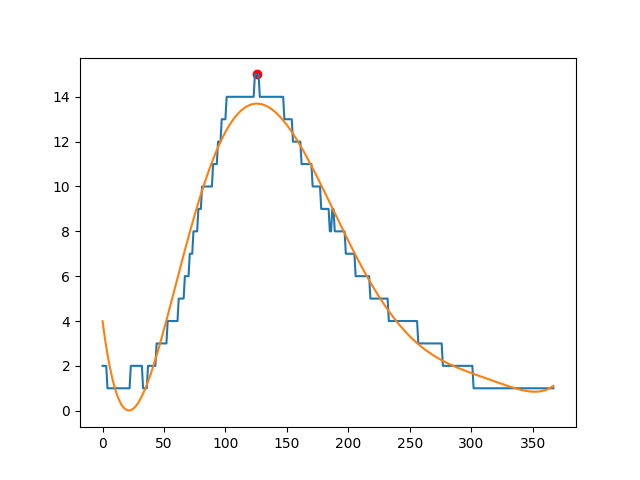

In [4]:
i=12
curr1=coll.subset('ae',0,1.6e-2).get_curr()[i]

p1=plt.figure()
plt.plot(curr1)

x=np.arange(0,curr1.size)

f=np.polyfit(x,curr1,6)
f2=np.poly1d(f)(x)
plt.plot(f2)

indexes=pu.indexes(f2,thres=4,thres_abs=True)
plt.scatter(indexes,curr1[indexes],marker='o',color='r')

<IPython.core.display.Javascript object>


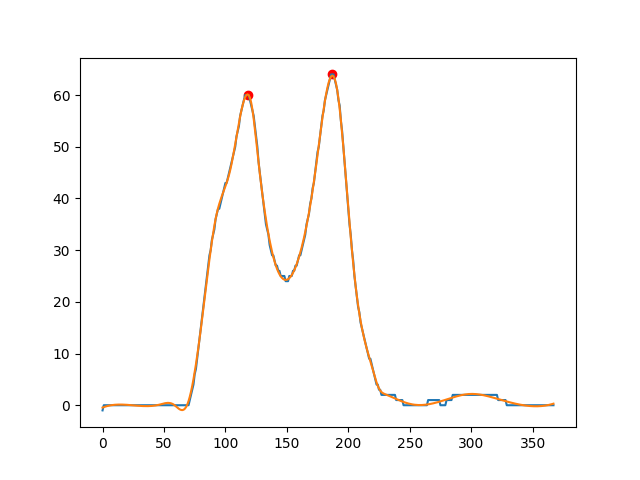

/tmp/ipykernel_4519/1693224307.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  bspl_y=splev(x,np.array(bspl))


In [5]:
from scipy.interpolate import splrep,splev
i=16
curr1=coll.subset('ae',0,1.6e-2).get_curr()[i]

p1=plt.figure()
plt.plot(curr1)

x=np.arange(0,curr1.size)

bspl=splrep(x,curr1,s=50)
bspl_y=splev(x,np.array(bspl))

plt.plot(bspl_y)

indexes=pu.indexes(bspl_y,thres=4,thres_abs=True)
plt.scatter(indexes,curr1[indexes],marker='o',color='r')




<IPython.core.display.Javascript object>


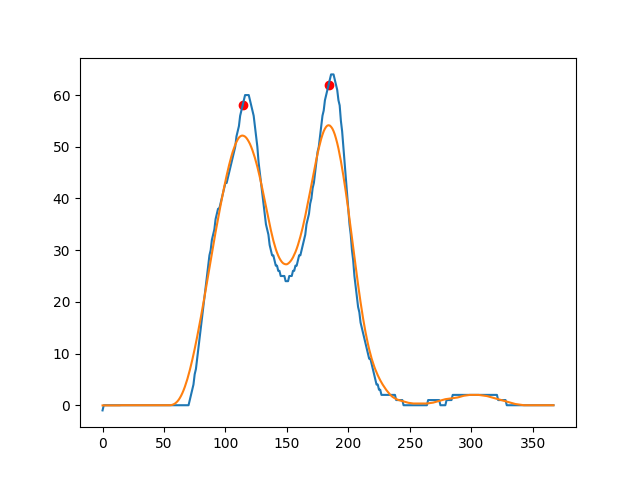

In [28]:
from scipy.signal import savgol_filter
i=16
curr1=coll.subset('ae',0,1.6e-2).get_curr()[i]

p1=plt.figure()
plt.plot(curr1)

x=np.arange(0,curr1.size)
f=savgol_filter(curr1,30,0)
plt.plot(f)

indexes=pu.indexes(f,thres=4,thres_abs=True)
plt.scatter(indexes,curr1[indexes],marker='o',color='r')